### Notation
In order to forecast using estimates from the delay distribution we develop the following notation. 


Suppose we have a time series $Y_1,Y_2,...,Y_n$ indexed by a sequence of time values $t_1,t_2,...,t_n$. We adopt the forecasting notation of Reich et. al (2018) in order to evaluate targets across models. 

Suppose we are interested in forecasting a target $z(*|t_j)$ at time $t_j$. In general, since data are delayed in being reported, we are interested in forecasting relative to a timepoint in the past relative to $t_j$. For our purposes, we fix a lag $L$ as the number of timepoints we go backwards into the past from a given $t_j$ at which our forecasts "originate".


For example, if $t_j$ is "now" then $t_j - L$ is the last $t^*$ for which all possible delay values $t^*,t^*+1, ....,+ t^*+L$ are completely observed. 

We define the following prediction $z(t_j - L +k | t_j)$ to be the *k-step* ahead prediction relative to time $t_j$. For our initial experiments, we define $z(t_j - L +k | t_j) = \hat{Y_{t_j - L + k}}$, so that we can define the MSE of model $M$ to be 

$$MSE_{t_j}(M) = \frac{1}{L}\sum_{k=0}^L [z(t_j - L +k | t_j) - Y_{j-L+k}]^2$$

In order to compute an average MSE over the full model $M$ we compute 

$$MSE(M) = \frac{1}{|T|}\sum_{t_j \in T}MSE_{t_j}(M)$$


For this experiment we examine 2 models 

$$M_1 = \text{ process model ignorning delay }$$

$$M_2 = \text{ process model weighted by delay distribution }$$


### Models

In this section we explore the difference between the two models, $M_1$ and $M_2$ more closely.

Suppose we have a "black box" routine that takes a time series from $Y_1,..,Y_i$ and produces forecasts for arbitrary $t_j$ for $j > i$.


Consider the naive model $M_1$ that ignores the delayed nature of the data. Here we take $Y_1,...,Y_{j-L}$ to be the set of data points with completely observed delay values, in the notation of Hole et al (2013), the complete reporting rectangle. The "naive" model that ignores the traingle, and thus the delay distribution, uses  $Y_1,...,Y_{j-L}$ to make forecasts for $t_j-L + k$ with $k > 0$. 


If we denote $F^{M_1}_{t_j}$ as the set of forecasts produced by model $M_1$ at time $t_j$. 

$$F^{M_1}_{t_j} = \{ z(t_j - L | t_j) , z(t_j - L + 1 | t_j ), z(t_j - L + 2| t_j ) ... ,z(t_j - L + K| t_j ) \}$$

We can adopt this to the situation where we incorporate partially observed data $t_j^*$, as follows:

$$F^{M_2}_{t_j} = \{ z(t_j - L | t_j,(t_j - L)^* ) , z(t_j - L + 1 | t_j,(t_j - L + 1)^* ), z(t_j - L + 2| t_j, (t_j - L + 3)^* ) ... ,z(t_j - L + K| t_j, (t_j - L + K)^* ) \}$$


The full set of forecasts varies over a set $t_j$

$$F^{M_1} = \cup_{j \in J} F^{M_1}_{t_j}$$


The question naturally becomes how to evaluate $z(t_j - L | t_j,(t_j - L)^* )$, that is how do we incorporate the partially observed data $(t_j - L)^*$.

We choose to write the likelihood of $Y_{t_j - L +k}^*$ as


$$ Y_{t_j - L +k}^* \sim Binom(Y_{t_j - L +k},\sum_{d=0}^{*} p_d)$$

We simply set 

$$z(t_j - L | t_j,(t_j - L)^* )  = \sum_{i} w_i *z(t_j - L | t_j)^{(mc)}$$

where $i$ indexes over a set of Monte Carlo samples of the target z(t_j - L | t_j) and $w_i$ is a normalized weight from the likelihood.





### Example

To make things more concrete we consider an example applied to Dengue incidence in Thailand province number 10. 

Let's first load the dataset.



In [47]:
data = []
with open ("province-biweek_with_delays.csv") as f:
        for line in f.readlines():
                data.append(line.replace("\n","").split(','))

province_10 = []

for dat in data:
        if dat[2] == "10":
                province_10.append(dat)

print (province_10)

[['2014', '1', '10', '85', '2014', '4'], ['2014', '1', '10', '8', '2014', '12'], ['2014', '1', '10', '1', '2014', '3'], ['2014', '1', '10', '79', '2014', '2'], ['2014', '2', '10', '1', '2014', '5'], ['2014', '2', '10', '186', '2014', '4'], ['2014', '2', '10', '5', '2014', '2'], ['2014', '2', '10', '5', '2014', '12'], ['2014', '2', '10', '6', '2014', '6'], ['2014', '3', '10', '3', '2014', '7'], ['2014', '3', '10', '1', '2015', '9'], ['2014', '3', '10', '9', '2014', '12'], ['2014', '3', '10', '75', '2014', '6'], ['2014', '3', '10', '1', '2014', '18'], ['2014', '3', '10', '102', '2014', '4'], ['2014', '4', '10', '121', '2014', '6'], ['2014', '4', '10', '2', '2014', '17'], ['2014', '4', '10', '17', '2014', '7'], ['2014', '4', '10', '1', '2014', '18'], ['2014', '4', '10', '4', '2014', '12'], ['2014', '5', '10', '1', '2014', '17'], ['2014', '5', '10', '3', '2014', '12'], ['2014', '5', '10', '1', '2015', '9'], ['2014', '5', '10', '1', '2014', '10'], ['2014', '5', '10', '23', '2014', '6'], ['2

Lets first take a look at all the dates where incidence occured.

In [61]:
import numpy as np
province_10 = np.array(province_10)
dates = np.unique(province_10[:,0:2],axis=0)
print (dates)

[['2014' '1']
 ['2014' '10']
 ['2014' '11']
 ['2014' '12']
 ['2014' '13']
 ['2014' '14']
 ['2014' '15']
 ['2014' '16']
 ['2014' '17']
 ['2014' '18']
 ['2014' '19']
 ['2014' '2']
 ['2014' '20']
 ['2014' '21']
 ['2014' '22']
 ['2014' '23']
 ['2014' '24']
 ['2014' '25']
 ['2014' '26']
 ['2014' '3']
 ['2014' '4']
 ['2014' '5']
 ['2014' '6']
 ['2014' '7']
 ['2014' '8']
 ['2014' '9']
 ['2015' '1']
 ['2015' '10']
 ['2015' '11']
 ['2015' '12']
 ['2015' '13']
 ['2015' '14']
 ['2015' '15']
 ['2015' '16']
 ['2015' '17']
 ['2015' '18']
 ['2015' '19']
 ['2015' '2']
 ['2015' '20']
 ['2015' '21']
 ['2015' '22']
 ['2015' '23']
 ['2015' '24']
 ['2015' '25']
 ['2015' '26']
 ['2015' '3']
 ['2015' '4']
 ['2015' '5']
 ['2015' '6']
 ['2015' '7']
 ['2015' '8']
 ['2015' '9']
 ['2016' '1']
 ['2016' '10']
 ['2016' '11']
 ['2016' '12']
 ['2016' '13']
 ['2016' '14']
 ['2016' '15']
 ['2016' '16']
 ['2016' '17']
 ['2016' '18']
 ['2016' '19']
 ['2016' '2']
 ['2016' '20']
 ['2016' '21']
 ['2016' '22']
 ['2016' '23']


Note these are sorted in lexographic order because they are strings. We have exactly 

In [58]:
print len(np.unique(province_10[:,0:2],axis=0))

78


Unique dates in the dataset. We can now map this to our notation. We have a time series 

$$Y_1,Y_2,.....,Y_{78}$$

For each $Y_i$ we consider a delay value $D$. To keep this simple to start with, let's fix $D=10$.

We can now construct a matrix of size $t_j, D$ or $78 x 10$ in order to fill in our reporting polygon.

In [60]:
reporting_polygon = np.zeros((78,10))

In order to correctly map dates into indeces we create the following dictionary by taking our dates object, converting it to an integer array, and sorting it.

In [64]:
index_dictionary = dict()
print (dates[0])

['2014' '1']


In [45]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sat Jan  6 17:12:30 2018

@author: gcgibson
"""

import scipy.stats
import sys
import numpy as np
from numpy.random import random
import math
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason

def observation_function(time_series_at_t,t,D,particle,params):
    
    tmp =  scipy.stats.poisson.pmf(time_series_at_t,np.exp(particle))
    if math.isnan(tmp):
        tmp = 0
    return tmp

def transition_function(particles,params):
    particles[:,0]  += np.random.normal(0,1,len(particles))
    return particles

def expected_value_observation_function(p):
    return np.exp(p)

def expected_value_transition_function(p):
    return p

def create_uniform_particles( N,state_space_dimension):
    particles  = np.random.normal(0,1 , size=(N,state_space_dimension))
    return particles

def predict(particles,t,params):
    particles = transition_function(particles,params)
    return particles


def update(particles, weights,ts,t,D,params):
    weights.fill(1.)
    for p in range(len(particles)):
        weights[p] *= observation_function(ts[t],t,D,particles[p],params)
    weights += 1.e-300
    return weights/sum(weights)  



def neff(weights):
    return 1. / np.sum(np.square(weights))


def estimate(particles, weights):
    """returns mean and variance of the weighted particles"""
    pos = particles[:, 0]
    mean = np.average(pos, weights=weights, axis=0)
    var  = np.average((pos - mean)**2, weights=weights, axis=0)
    return mean, var

### VARIOUS RESAMPLING SCHEMES
def multinomal_resample(weights):
    cumulative_sum = np.cumsum(weights)
    cumulative_sum[-1] = 1.  # avoid round-off errors
    return np.searchsorted(cumulative_sum, random(len(weights)))


def resample_from_index(particles, weights, indexes):
    particles[:] = particles[indexes]
    weights[:] = weights[indexes]
    weights.fill(1.0 / len(weights))
    return particles,weights

def stratified_resample(weights):
    N = len(weights)
    # make N subdivisions, chose a random position within each one
    positions = (random(N) + range(N)) / N

    indexes = np.zeros(N, 'i')
    cumulative_sum = np.cumsum(weights)

    i, j = 0, 0
    while i < N:
        if positions[i] < cumulative_sum[j]:
            indexes[i] = j
            i += 1
        else:
            j += 1
    return indexes



def run_pf(time_series,N,state_space_dimension,D,params):
    
    particles = create_uniform_particles(N=N,state_space_dimension=state_space_dimension)
    weights = np.zeros(N)    
    xs = [] 
    ws = []
    ws.append(weights)
    for t in range(len(time_series)):
        particles = predict(particles,t,params)       
        # incorporate measurements
        weights = update(particles, weights,time_series, t, D, params)
        ws.append(weights)
        #print (neff(weights),time_series[t],params)
        indexes = stratified_resample(weights)
        particles,weights = resample_from_index(particles, weights, indexes)
        mu, var = estimate(particles, weights)
        xs.append(mu.tolist())
    return xs,particles,ws

 


"""
Suppose we are given data in the form 

n_{0,0} , n_{0,1} , n_{0,2}, n_{0,3}
n_{1,0} , n_{1,1} , n_{1,2}, 0
n_{2,0} , n_{2,1} , 0      , 0
n_{3,0} , 0       , 0      , 0

where T=3.

Now suppose D=2, then we truncate this matrix as follows

n_{0,0} , n_{0,1} , n_{0,2}, 0
n_{1,0} , n_{1,1} , n_{1,2}, 0
n_{2,0} , n_{2,1} , 0      , 0
n_{3,0} , 0       , 0      , 0


so for a setting of parameters (T=2,D=3) the reporting trapezoid is completely 
defined

In order to get the N_{t,T}s we simply add up the rows


"""
SIMULATE = False
D = 20
if SIMULATE == False:
    n_t_d = []
    with open("province-biweek_with_delays.csv") as f:
        i = 0
        for line in f.readlines():
            if i > 0:
                n_t_d.append(line.replace("\n","").split(','))
            i+=1
    date_to_index = {}
    
    i = 0
    for elm in n_t_d:
        if len(elm[1]) == 1:
            elm[1] = "0" + elm[1]
        date_to_index[elm[0]+elm[1]] = i
    
        i+=1
    
    d_to_i = {}
    i = 0
    iter_ =  date_to_index.keys()
    iter_.sort()
    for key in iter_:
    
        d_to_i[key] = i
        i+=1
    
    n_t = np.zeros((52-1,52-1))
    
    for elm in n_t_d:
        try:
            
            sick_date = d_to_i[elm[0]+elm[1]]
            report_date = d_to_i[elm[4] + elm[5]]
            if int(elm[4] + elm[5]) < 201626 and int(elm[2]) == 10:
                n_t[sick_date][report_date] += int(elm[3])
            
        except:
            pass
    
    
   
    
    n_t_d = []
    for row in range(len(n_t)):
        #if len(n_t[row][row:row+D]) == D:
            tmp = n_t[row][row:row+D].tolist()
            while len(tmp) < D:
                tmp += [0]
            n_t_d.append(tmp)
    
    n_t_d = np.array(n_t_d)
    
    n_t_inf = np.sum(n_t_d,axis=1)

else:
    true_p = [.1,.3,.2,.15,.15,.1]
    n_t_d = []
    n_t_inf = []
    states = []
    tmp = np.random.normal(4,1 ,1)
    states.append(tmp)
    n_t_inf.append(np.random.poisson(np.exp(tmp))[0])
    for i in range(1,10):
        tmp = np.random.normal(states[i-1],1,1)
        states.append(tmp)
        n_t_inf.append(np.random.poisson(np.exp(tmp))[0])
    for i in range(len(n_t_inf)):
        n_t_d.append(np.random.multinomial(n_t_inf[i],true_p).tolist())
        
    


total_mse_m1 = 0
total_mse_m2 = 0

print (n_t_d.shape)

## 51x10
print (n_t_inf.shape)

## 51




(51, 20)
(51,)


100%|██████████| 50500/50500 [00:20<00:00, 2471.93it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


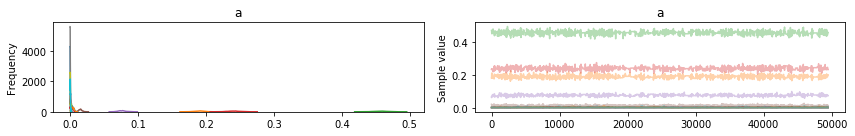

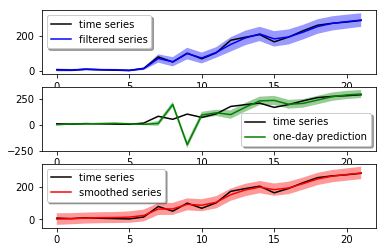

MSE ignoring delay
79640.21700858981
MSE delay adjusted
76502.22365192002
MSE taking most likely trajectory
68535.15732874186


100%|██████████| 50500/50500 [00:18<00:00, 2781.66it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


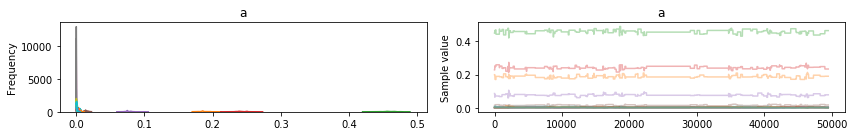

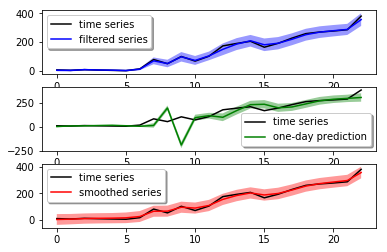

MSE ignoring delay
115007.99773608241
MSE delay adjusted
108630.65057410188
MSE taking most likely trajectory
100670.8183019279


100%|██████████| 50500/50500 [00:20<00:00, 2419.43it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


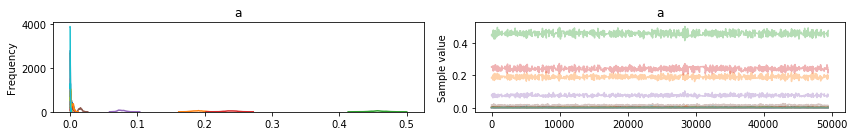

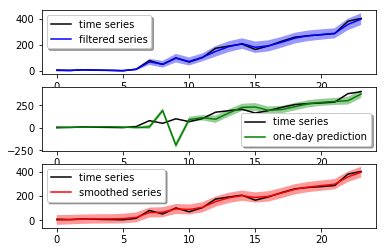

MSE ignoring delay
141612.11516924802
MSE delay adjusted
132279.98275173866
MSE taking most likely trajectory
138769.26802934395


100%|██████████| 50500/50500 [00:16<00:00, 3092.68it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


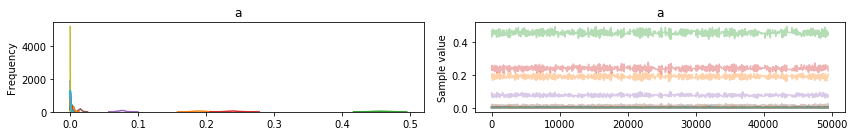

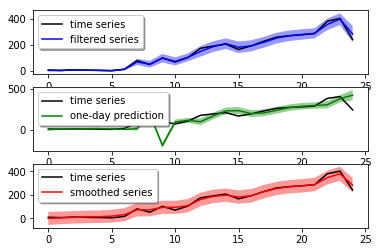

MSE ignoring delay
128086.68080918079
MSE delay adjusted
123790.18931122136
MSE taking most likely trajectory
135087.62915380578


100%|██████████| 50500/50500 [00:15<00:00, 3347.95it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


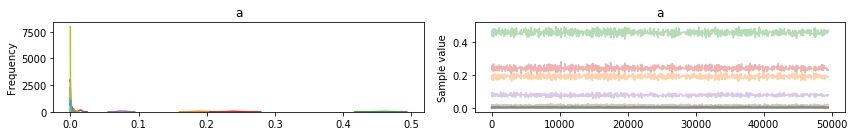

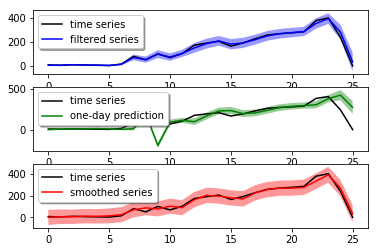

MSE ignoring delay
169636.25473427548
MSE delay adjusted
158614.6929764234
MSE taking most likely trajectory
195358.57876827123


100%|██████████| 50500/50500 [00:17<00:00, 2904.58it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


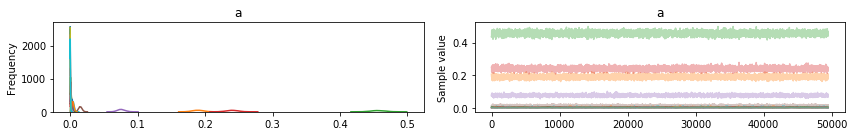

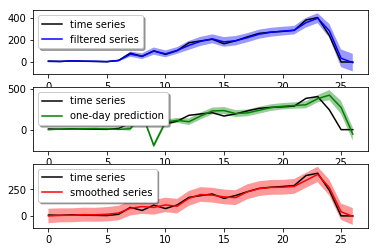

MSE ignoring delay
268850.2236953763
MSE delay adjusted
255525.76448458285
MSE taking most likely trajectory
261072.84323823653


100%|██████████| 50500/50500 [00:13<00:00, 3620.13it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


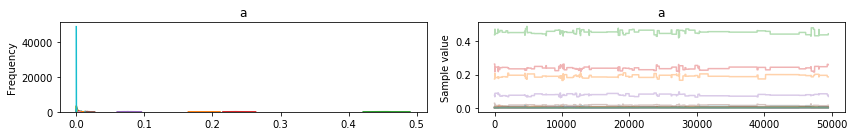

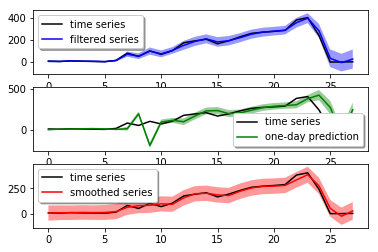

MSE ignoring delay
418302.7142003214
MSE delay adjusted
411537.8910156841
MSE taking most likely trajectory
405601.6386265737


100%|██████████| 50500/50500 [00:14<00:00, 3583.79it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


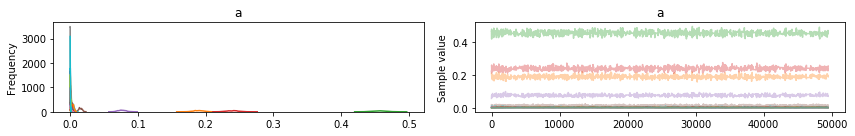

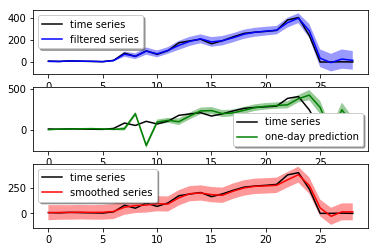

MSE ignoring delay
806748.4057500678
MSE delay adjusted
804301.8705855331
MSE taking most likely trajectory
763127.7977386756


100%|██████████| 50500/50500 [00:13<00:00, 3638.69it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


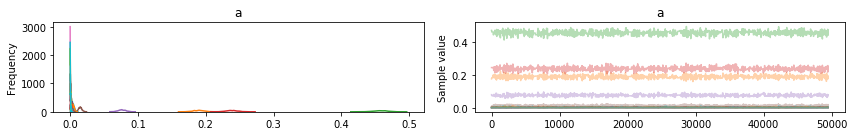

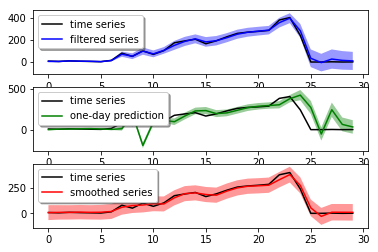

MSE ignoring delay
1713703.175881814
MSE delay adjusted
1713014.9549394909
MSE taking most likely trajectory
1769311.4554335698


100%|██████████| 50500/50500 [00:13<00:00, 3729.83it/s]


Starting forward filtering...
Forward fitering completed.
Starting backward smoothing...
Backward smoothing completed.


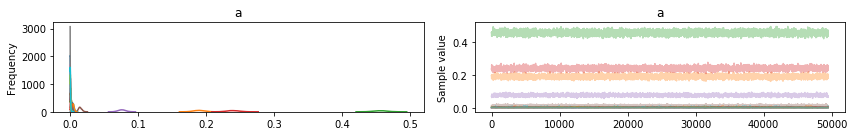

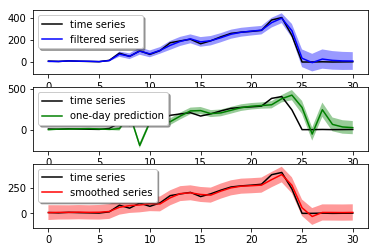

MSE ignoring delay
1924699.2275637034
MSE delay adjusted
1924081.1107145979
MSE taking most likely trajectory
1864506.2548827305
--------------



MSE ignoring delay
5766287.012548659
MSE delay adjusted
5708279.331005294


In [44]:

T = range(len(n_t_d)-10,len(n_t_d))
for tau in T:


    train_n_t_d = n_t_d[:tau-D + 1]
    train_n_t_inf = n_t_inf[:tau-D + 1]
    #print (test_n_t_inf.shape)
    count = D
    for t_prime in range(len(train_n_t_d)-D,len(train_n_t_d)):
        train_n_t_d[t_prime][count:] = 0
        count -=1
    
    test_n_t_d = n_t_d[tau- D + 1:tau ]
    test_n_t_inf = n_t_inf[tau-D +1:tau ]
    

    import numpy as np
    import pymc3 as pm
    import pandas as pd


    ## Delay Model

    DELAY_DIST = True
    if DELAY_DIST == True:

        k = np.array(train_n_t_d).shape[1 ]

        with pm.Model() as multinom_test:
            a = pm.Dirichlet('a', a=np.ones(k))
            for i in range(len(train_n_t_d)):
                data_pred = pm.Multinomial('data_pred_%s'% i, n=sum(train_n_t_d[i]), p=a, observed=train_n_t_d[i])
            trace = pm.sample(50000, pm.Metropolis())
            #trace = pm.sample(1000) # also works with NUTS

        pm.traceplot(trace[500:]);

    state_trajectories = []
    PF = False
    if  PF:
        N = 10000
        state_space_dimension = 1

        params = []
        means , particles, weights = run_pf(train_n_t_inf,N,state_space_dimension,D,params)



        ### Interval Predictions
        state_trajectories = [particles]
        observation_trajectories = [np.exp(particles)]
        for i in range(len(test_n_t_inf)):
            tmp = expected_value_transition_function(state_trajectories[i-1])
            observation_trajectories.append(expected_value_observation_function(tmp))
            state_trajectories.append(tmp) 

        state_trajectories = state_trajectories[1:]
        ## MEAN
        #print (np.mean(observation_trajectories,axis=1))
        ## QUANTILES 
        state_trajectories = np.array(state_trajectories).reshape((len(test_n_t_inf),-1))


    else:
        myDLM = dlm(train_n_t_inf)
        myDLM = myDLM + trend(1, name='lineTrend', w=1.0)
        # add a 7 day seasonality with prior covariance 1.0
        myDLM = myDLM + seasonality(52, name='7day', w=1.0)
        # add a 3 step auto regression
        myDLM = myDLM + autoReg(degree=2, data=train_n_t_inf, name='ar3', w=1.0)
        myDLM.fit()
        (predictMean, predictVar) = myDLM.predictN(N=D-1, date=myDLM.n-1)




    for i in range(len(predictMean)):
        samples = np.random.normal(predictMean[i],np.sqrt(predictVar[i]),100)
        state_trajectories.append(samples)
    state_trajectories = np.array(state_trajectories)


    phat = trace['a'].mean(axis=0)
    from scipy.stats import binom



    myDLM.plot()

    ##compute weighted trajectories 

    weighted_trajectories = []
    for i in range(len(state_trajectories)):
        tmp = []
        samples = state_trajectories[i]
        row_sum = sum(test_n_t_d[i])
        q = sum(phat[:len(phat)-i-1])
        for samp in samples:
            btemp = binom.pmf(row_sum,samp,q)
            if np.isnan(btemp):
                tmp.append(0)
            else:
                tmp.append(btemp)
            #print (row_sum,samp,q,btemp)
        weighted_trajectories.append(tmp)
    weighted_trajectories = np.array(weighted_trajectories)

    
    for i in range(len(weighted_trajectories)):
        weighted_trajectories[i] = weighted_trajectories[i]/sum(weighted_trajectories[i])
    where_are_NaNs = np.isnan(weighted_trajectories)
    weighted_trajectories[where_are_NaNs] = 1e-50
    #print (weighted_trajectories)
    ###
    from sklearn.metrics import mean_squared_error



    max_indeces = np.argmax(weighted_trajectories,axis=1)
    max_point = []
    for i in range(len(max_indeces)):
        max_point.append(state_trajectories[i][max_indeces[i]])


    print "MSE ignoring delay"
    print (mean_squared_error(np.average(state_trajectories,axis=1),test_n_t_inf))
    total_mse_m1 += mean_squared_error(np.average(state_trajectories,axis=1),test_n_t_inf)
    print "MSE delay adjusted"
    print (mean_squared_error(np.average(state_trajectories,weights = weighted_trajectories,axis=1),test_n_t_inf))
    total_mse_m2 += mean_squared_error(np.average(state_trajectories,weights = weighted_trajectories,axis=1),test_n_t_inf)
    print "MSE taking most likely trajectory"
    print (mean_squared_error(max_point,test_n_t_inf))


print "--------------\n\n\n"
print "MSE ignoring delay"
print (total_mse_m1)
print "MSE delay adjusted"
print (total_mse_m2)


MSE ignoring delay
5766287.012548659
MSE delay adjusted
5708279.331005294